In [1]:
import pandas as pd
from PIL import Image
import os
df = pd.read_csv("/home/ubuntu/data/synthetic_data/labels/output_labels_train.csv")  


image_dir = "/home/ubuntu/data/synthetic_data/data" 


total_width, total_height = 0, 0
count = 0


for filename in df['image_filename']:
    image_path = os.path.join(image_dir, filename)
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            total_width += width
            total_height += height
            count += 1
    except FileNotFoundError:
        print(f"Image not found: {image_path}")
    except Exception as e:
        print(f"Error reading {image_path}: {e}")


if count > 0:
    avg_width = total_width / count
    avg_height = total_height / count
    print(f"Average Width: {avg_width:.2f}px")
    print(f"Average Height: {avg_height:.2f}px")
else:
    print("No images found or processed.")


KeyboardInterrupt: 

In [144]:
from PIL import Image
import os
import numpy as np

# Define the resize and patching function
def resize_and_patch_image(image_path, target_size=(128, 1536), patch_size=(32, 32)):
    """
    Resize image while maintaining aspect ratio, pad to target_size, and split into patches of patch_size.
    Returns a list of patches as NumPy arrays.
    """
    target_height, target_width = target_size
    patch_height, patch_width = patch_size

    with Image.open(image_path) as img:
        # Convert to RGB if grayscale or other mode
        img = img.convert("RGB")
        
       
        aspect_ratio = img.width / img.height
        new_height = target_height
        new_width = min(int(aspect_ratio * new_height), target_width)
        img_resized = img.resize((new_width, new_height), Image.BICUBIC)
   
        padded_img = Image.new("RGB", (target_width, target_height), (0, 0, 0))
        padded_img.paste(img_resized, (0, 0))
        

        img_array = np.array(padded_img)
        plt.imshow(padded_img)
        patches = []
        for y in range(0, target_height, patch_height):
            for x in range(0, target_width, patch_width):
                patch = img_array[y:y+patch_height, x:x+patch_width]
                if patch.shape[0] == patch_height and patch.shape[1] == patch_width:
                    patches.append(patch)
        
        return patches




(192, (32, 32, 3))

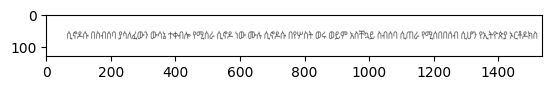

In [147]:
import random
rand_index =  random.randint(0, len(df['image_filename'])) 
filename = df['image_filename'][rand_index]
image_path = os.path.join(image_dir, filename)

patches = resize_and_patch_image(image_path)
len(patches), patches[0].shape  # Should be 64 patches of shape (64, 64, 3)


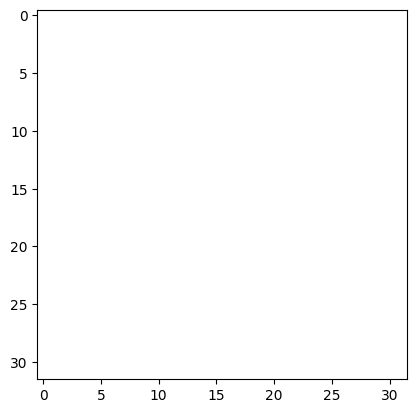

In [4]:
import matplotlib.pyplot as plt

plt.imshow(patches[30])

